# Domain Analysis

# Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report,roc_curve,RocCurveDisplay,auc,roc_auc_score


In [3]:
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style('whitegrid')
sns.set_palette('RdYlBu_r')

In [5]:
headings=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Target']
data=pd.read_csv("Liver patient.csv",names=headings)

# Basic checks

In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [8]:
data.shape

(583, 11)

In [9]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Target                          int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [12]:
data.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


In [13]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [14]:
data.Target.unique()

array([1, 2], dtype=int64)

In [15]:
data.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

# Removing the duplicates

In [16]:
duplicates=data[data.duplicated()]
len(duplicates)

13

In [17]:
print('No of duplicate values:', duplicates.shape[0], '\nsize of data:', data.shape)

No of duplicate values: 13 
size of data: (583, 11)


In [18]:
data=data.drop_duplicates()
data.shape

(570, 11)

# Categorical and numerical columns segregation

In [19]:
cat_cols=[]
num_cols=[]
for i in data.columns:
    if data[i].dtype=='object':
        cat_cols.append(i)
    else:
        num_cols.append(i)
print('catgorical columns are:- \n',cat_cols,end=' ')
print('\n')
print('numerical columns are:-\n',num_cols,end=' ')

catgorical columns are:- 
 ['Gender'] 

numerical columns are:-
 ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'] 

In [20]:
num_data=data[num_cols]
cat_data=data[cat_cols]

In [21]:
num_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [22]:
cat_data.head()

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male


In [23]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [24]:
data.Gender.value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

# Exploratory data analysis

# Univariate analysis for numerical data

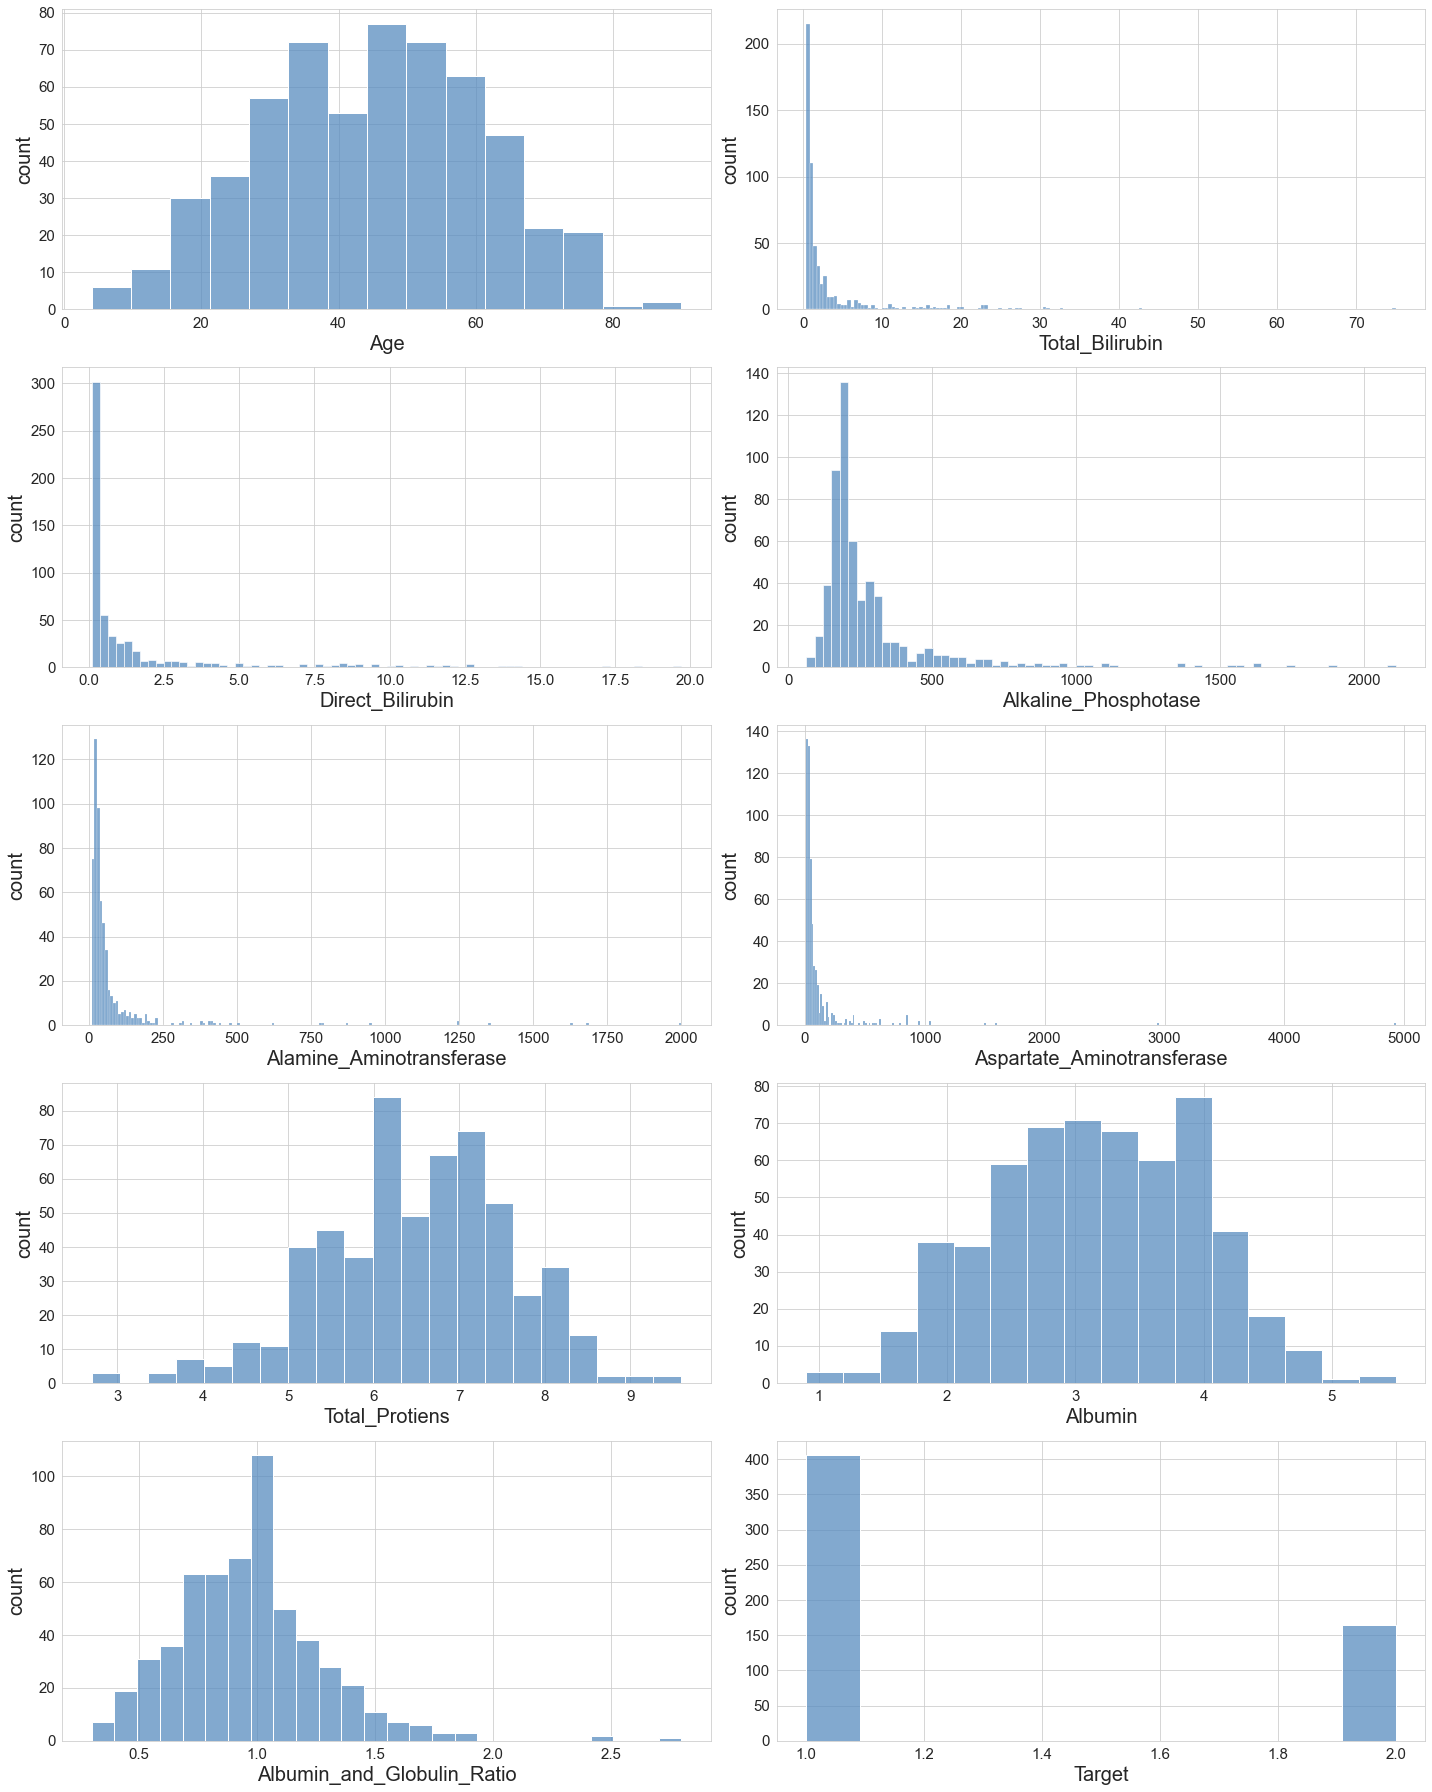

In [25]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for i in num_data:
    
    plt.subplot(5,2,plotnumber)
    sns.histplot(x=i,data=data)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plotnumber+=1
plt.tight_layout()

●`data['Age']` -- the age column is normally distributed so the maximum data is taken for the age between 30-60
●`data['Total_Bilirubin]`,`data['Direct_Bilirubin']`,`data['Alkaline_Phosphotase']`,`data['Alamine_Aminotransferase']``data['Aspartate_Aminotransferase']`- most of the values are in the range of normal person health condition few entries are having values over the range of healthy person

●`data['Total_Protiens']`--- most of the people having protein count between 5-8 which is normal

●`data['Albumin']` & `data['AAlbumin_and_Globulin_Ratio']` also having most entries in the normal range

# Univariate analysis for categorical data

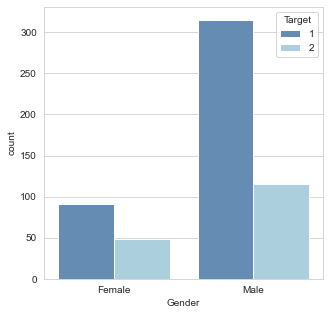

In [26]:
plt.figure(figsize=(5,5),facecolor='white')
sns.countplot(x='Gender',hue='Target',data=data)
plt.show()

●   most of the liver daigonisis patients are male and male are prone to liver disease

# Bivariate analysis

<Figure size 360x360 with 0 Axes>

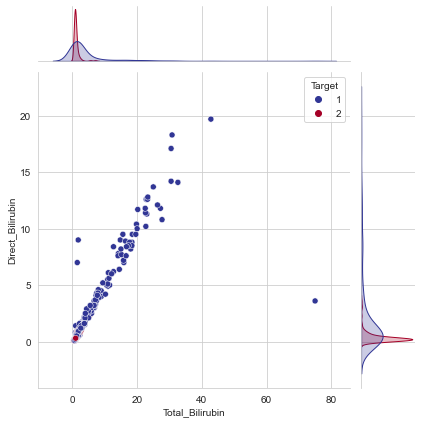

In [27]:
plt.figure(figsize=(5,5))
sns.jointplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Target',palette='RdYlBu_r',data=data)
plt.show()

<Figure size 360x360 with 0 Axes>

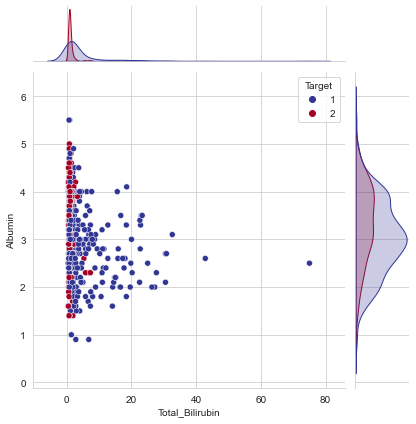

In [28]:
plt.figure(figsize=(5,5),facecolor='white')
sns.jointplot(x='Total_Bilirubin',y='Albumin',palette='RdYlBu_r',hue='Target',data=data)
plt.show()

<Figure size 360x360 with 0 Axes>

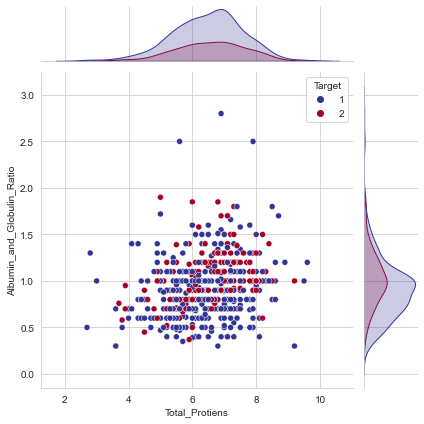

In [29]:
plt.figure(figsize=(5,5),facecolor='white')
sns.jointplot(x='Total_Protiens',y='Albumin_and_Globulin_Ratio',palette='RdYlBu_r',hue='Target',data=data)
plt.show()

# Multivariate analysis

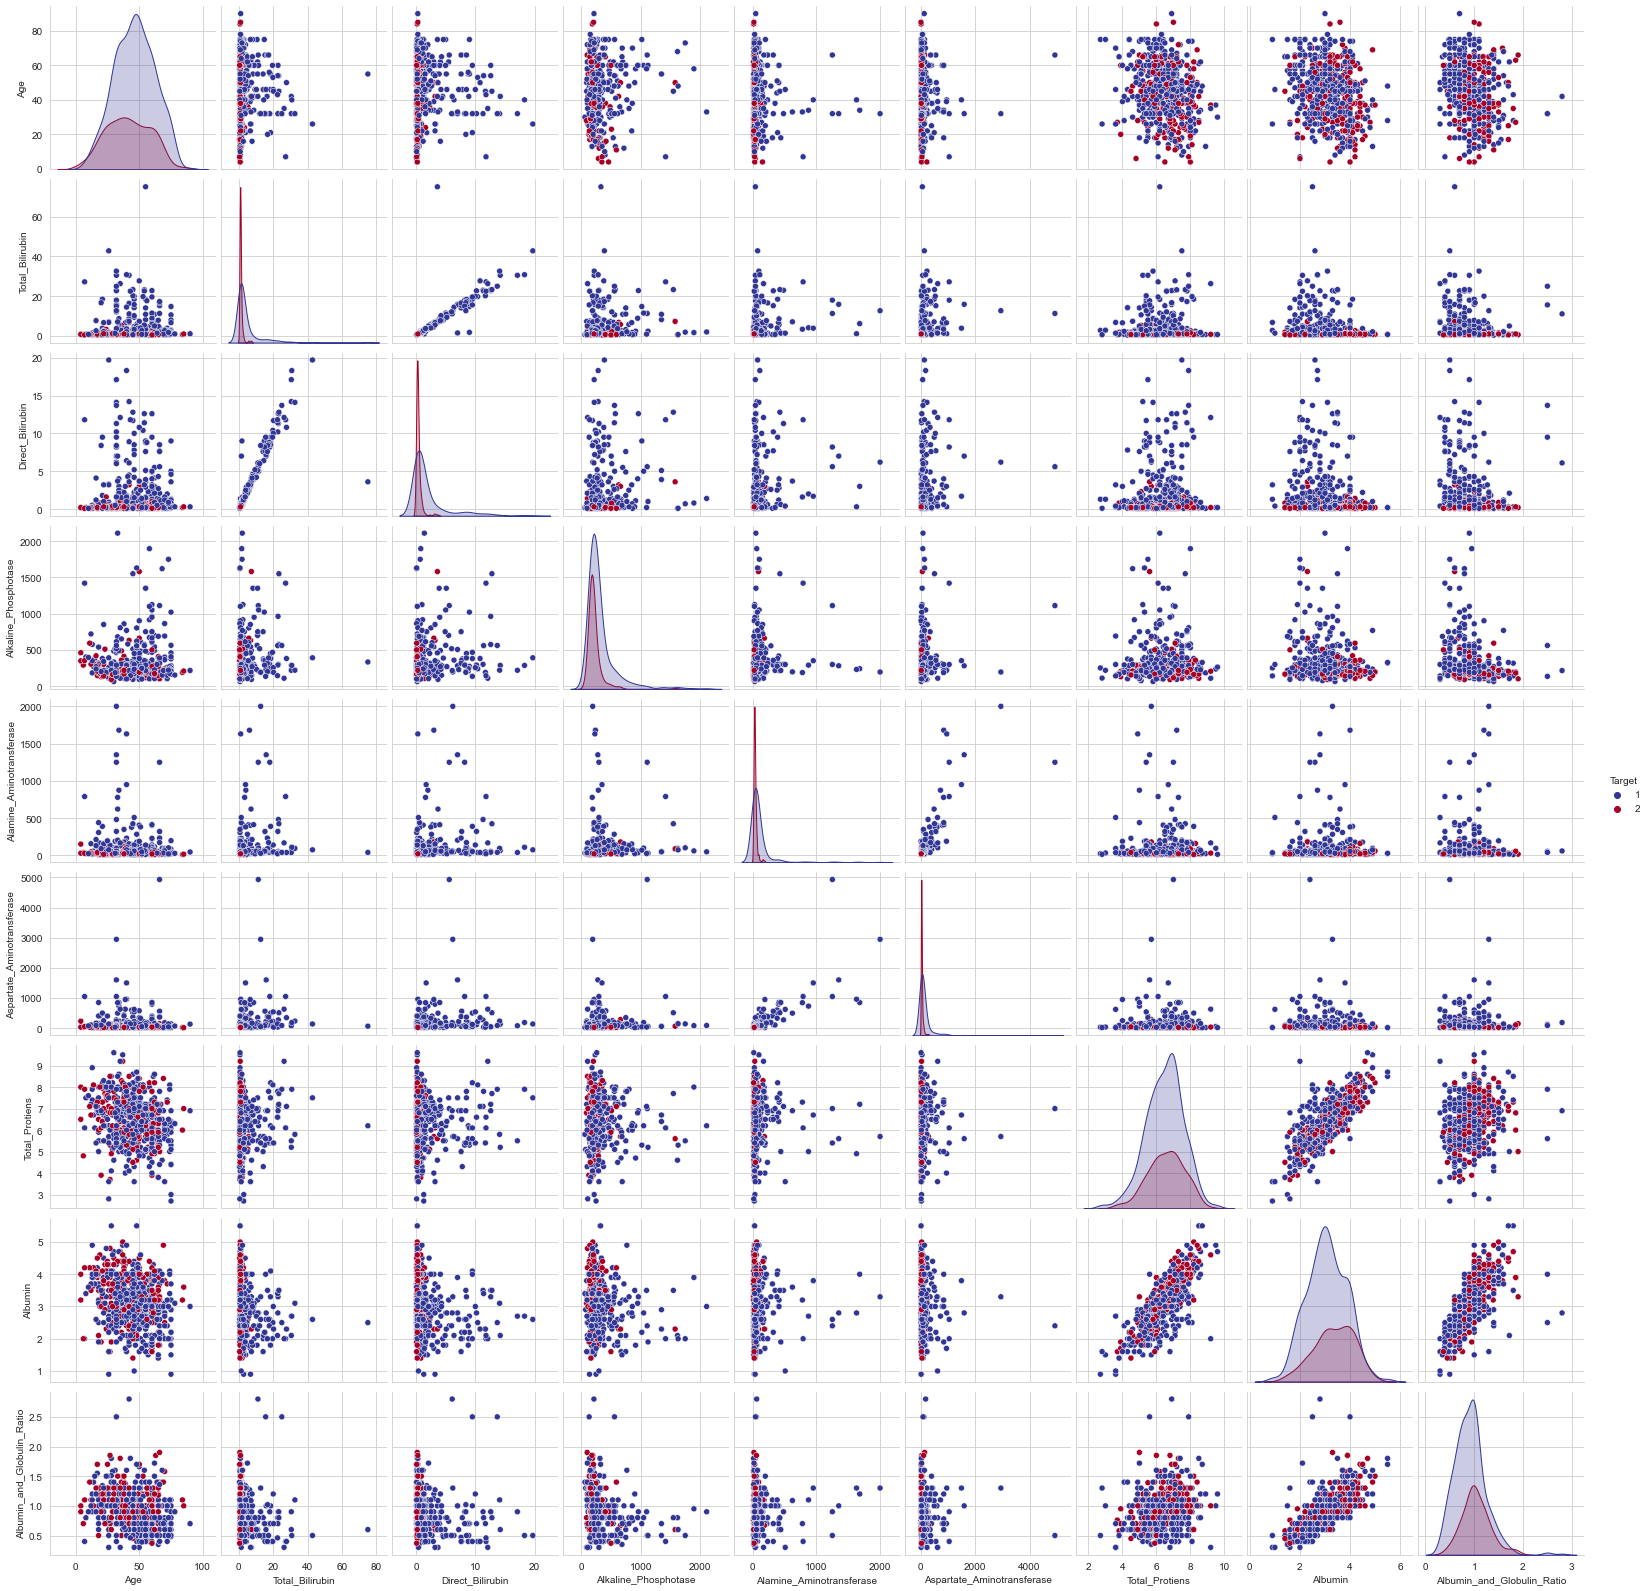

In [30]:
sns.pairplot(data,hue='Target',palette='RdYlBu_r')



*   with the increment of `albumin`  the `albumin_glucose_ratio` is increasing
*   and also with it has direct corelation with total protien of the body
*   the `total bilirubin` and `direct bilirubin` is directly corelated




# Data preprocessing

In [31]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

# Handing missing values

In [32]:
data.dropna(inplace=True)

In [33]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [34]:
data.shape

(566, 11)

# Converting categorical data into numerical data

# one hot encoder

In [35]:
data.Gender.value_counts()

Male      428
Female    138
Name: Gender, dtype: int64

In [36]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)

In [37]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [38]:
data.Gender.value_counts()

1    428
0    138
Name: Gender, dtype: int64

# check for outliers

In [39]:
num_data.columns[:-1]

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

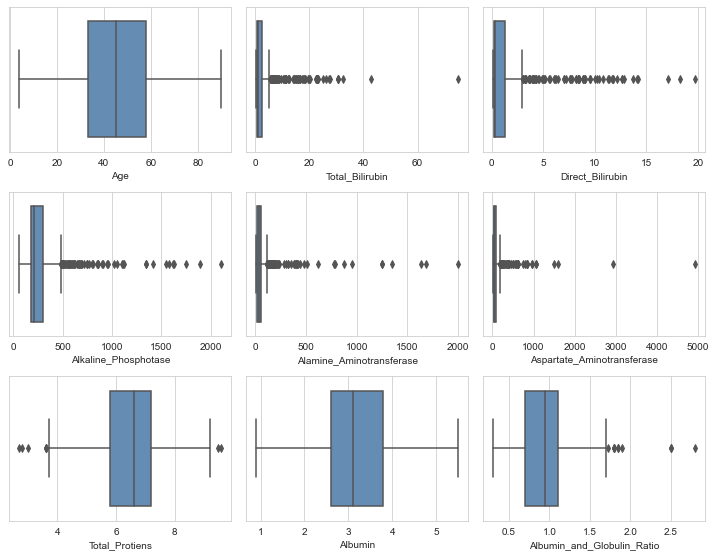

In [40]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in num_data.columns[:-1]:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(data[column],orient='h')
    plt.xlabel(column,fontsize=10)
    plt.xticks(fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

In [41]:
cols=['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']

In [42]:
data.shape

(566, 11)

In [43]:
#log transformation
for i in cols:
    data[i]=np.log(data[i])

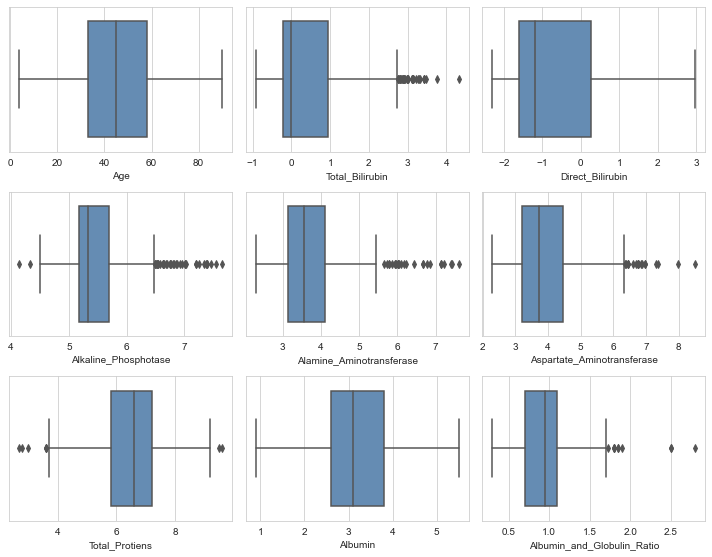

In [44]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in num_data.columns[:-1]:

    plt.subplot(4,3,plotnumber)
    sns.boxplot(data[column],orient='h')
    plt.xlabel(column,fontsize=10)
    plt.xticks(fontsize=10)
    plotnumber+=1

plt.tight_layout()

In [45]:
#median imputation
len(data.loc[data['Total_Bilirubin']>2.9])

24

In [46]:
data.loc[data['Total_Bilirubin']>2.9,'Total_Bilirubin']=np.median(data['Total_Bilirubin'])

In [47]:
len(data.loc[data['Alkaline_Phosphotase']>6.5])

34

In [48]:
data.loc[data['Alkaline_Phosphotase']>6.5,'Alkaline_Phosphotase']=np.median(data['Alkaline_Phosphotase'])

In [49]:
len(data.loc[data['Alamine_Aminotransferase']>5.5])

27

In [50]:
data.loc[data['Alamine_Aminotransferase']>5.5,'Alamine_Aminotransferase']=np.median(data['Alamine_Aminotransferase'])

In [51]:
len(data.loc[data['Aspartate_Aminotransferase']>6.5])

15

In [52]:
data.loc[data['Aspartate_Aminotransferase']>6.5,'Aspartate_Aminotransferase']=np.median(data['Aspartate_Aminotransferase'])

In [53]:
len(data.loc[data['Albumin_and_Globulin_Ratio']>1.7])

10

In [54]:
data.loc[data['Albumin_and_Globulin_Ratio']>1.7,'Albumin_and_Globulin_Ratio']=np.median(data['Albumin_and_Globulin_Ratio'])

In [55]:
len(data.loc[data['Albumin_and_Globulin_Ratio']>1.7])

0

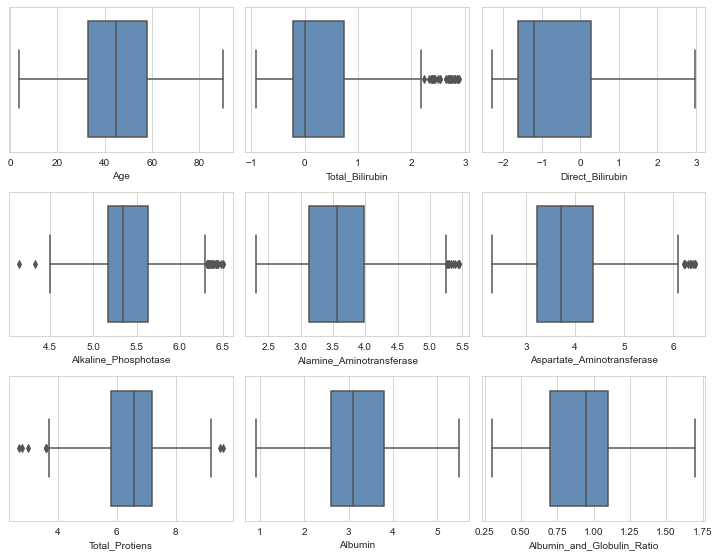

In [56]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in num_data.columns[:-1]:

    plt.subplot(4,3,plotnumber)
    sns.boxplot(data[column],orient='h')
#     data[column].iplot(kind='box')
    plt.xlabel(column,fontsize=10)
    plt.xticks(fontsize=10)
    plotnumber+=1

plt.tight_layout()

In [57]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90,1
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40,1


# feature selection

<AxesSubplot:>

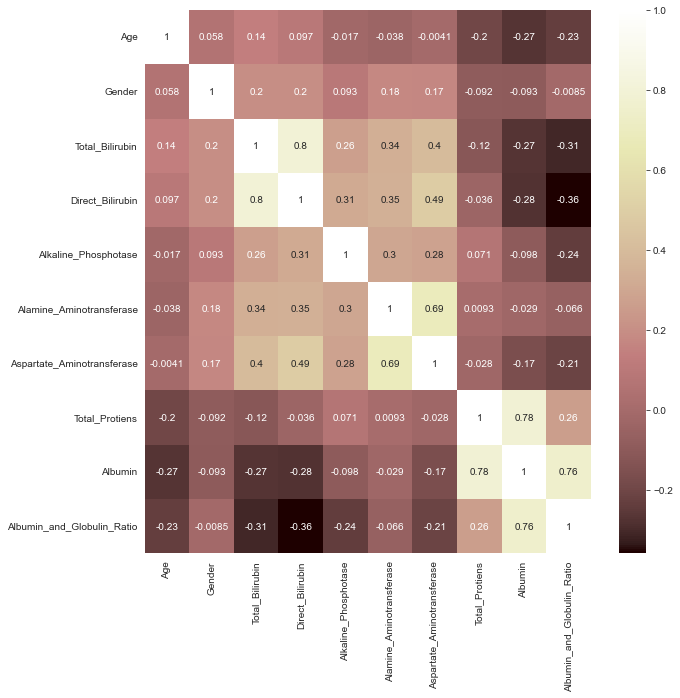

In [58]:
plt.figure(figsize=(10,10),facecolor='white')
sns.heatmap(data.iloc[:,:-1].corr(),annot=True,cmap='pink')


In [59]:
data.iloc[:,:-1].corrwith(data['Target']).sort_values()

Direct_Bilirubin             -0.325756
Total_Bilirubin              -0.287960
Aspartate_Aminotransferase   -0.287600
Alamine_Aminotransferase     -0.257252
Alkaline_Phosphotase         -0.184558
Age                          -0.133821
Gender                       -0.077396
Total_Protiens                0.036443
Albumin                       0.165273
Albumin_and_Globulin_Ratio    0.190167
dtype: float64

In [60]:
data['Target']=data['Target'].map({2:0,1:1})

In [61]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90,1
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40,1


In [62]:
X=data.iloc[:,:-1]
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40


In [63]:
y=data.Target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [64]:
y.value_counts()

1    404
0    162
Name: Target, dtype: int64

# Balancing of data

In [65]:
#apply smote
from imblearn.over_sampling import SMOTE,SVMSMOTE,ADASYN
smote=SMOTE()

In [66]:
X_smote,y_smote=smote.fit_resample(X,y)

In [67]:
from collections import Counter
print("actual classes",Counter(y))
print("smote classes",Counter(y_smote))

actual classes Counter({1: 404, 0: 162})
smote classes Counter({1: 404, 0: 404})


# train_test_split

In [68]:
 from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(646, 10)
(162, 10)
(646,)
(162,)


# Scaling of data

In [70]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()

In [71]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [72]:
y_smote.value_counts()

1    404
0    404
Name: Target, dtype: int64

In [73]:
len(X_train_scaled),len(y_train)

(646, 646)

# Required functions for ROC MODEL

In [74]:
def kf_cross_cv(model,X,y):
    '''this will prints the accuracies
        for given given model by k-fold cv method'''
    k=5
    score=cross_val_score(model,X,y,cv=k)
    print(f'the accuracies of kfold are :\n {score}')


def stratified_cv(model,X,y):
    '''this will prints the accuracies
        for given given model by stratified cv method'''
    n_splits=5
    random_state=None
    skf=StratifiedKFold(n_splits=n_splits,random_state=random_state)

    accuracy=[]
    for train_index, test_index in skf.split(X,y):
        X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
        y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]

        model.fit(X1_train,y1_train)
        prediction=model.predict(X1_test)
        score=accuracy_score(prediction,y1_test)
        accuracy.append(score)
    print(f'stratified mean accuracy are :\n {accuracy}')


In [75]:


def predict_best_threshold(model):
    """ Gives the balanced thrshold value
    using fpr,tpr,threshold values"""

    log_proba=model.predict_proba(X_test)

    fpr,tpr,threshold=roc_curve(y_test,log_proba[:,-1])

    gmeans=np.sqrt(tpr*(1-fpr))

    ix = np.argmax(gmeans)

    print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))



def roc_plot(model):
    """
    plots the roc curve using plot function
    """
    log=model.predict_proba(X_test)
    fpr,tpr,threshold=roc_curve(y_test,log[:,-1])
    auc_score=auc(fpr,tpr)
    RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc_score).plot()


def class_segregation(model):
    """
    this function will segregate the probabilities
    into classes based on given threshold value
    """
    log=model.predict_proba(X_test)

    res=[]
    threshold=float(input('enter the best thrshold value: '))
    for i in log:
        if i[1]>threshold:

            res.append(1)
        else:
            res.append(0)
    return res

def predition_roc(model):

    """
    This uses predict_best_threshold

    and class segregation to predict and

    create the confusion matrix
    """

    predict_best_threshold(model)

    final_pred=class_segregation(model)

    print("metrics on test data \n")

    print("confusion matrix: \n", confusion_matrix(y_test,final_pred))
    print("classification report: \n", classification_report(y_test,final_pred))


def cross_val_scores(model,x,y):
    """
    This will print the cross val scores
    of kfold and startified cv
    """

    print(kf_cross_cv(model,x,y))
    print('\n')
    print(stratified_cv(model,x,y))

def all_work(model,x,y):
    """
    This uses all previlosly created
    functions inorder and gives the overall results

    """

    cross_val_scores(model,x,y)

    print('====='*10)

    predition_roc(model)

    print('====='*10)

    roc_plot(model)



# Build Model

# logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

the accuracies of kfold are :
 [0.69298246 0.75221239 0.69911504 0.7079646  0.72566372]
None


stratified mean accuracy are :
 [0.6929824561403509, 0.7522123893805309, 0.6991150442477876, 0.7079646017699115, 0.7256637168141593]
None
Best Threshold=0.726247, G-Mean=0.741
enter the best thrshold value: 0.726247
metrics on test data 

confusion matrix: 
 [[69 17]
 [24 52]]
classification report: 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        86
           1       0.75      0.68      0.72        76

    accuracy                           0.75       162
   macro avg       0.75      0.74      0.74       162
weighted avg       0.75      0.75      0.75       162



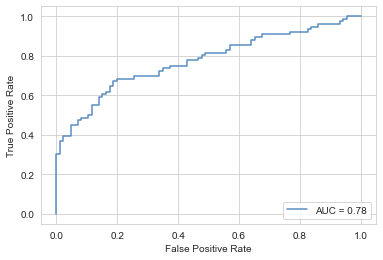

In [77]:
#Roc model
all_work(log_model,X,y)

# Normal model

In [78]:
log_model1=LogisticRegression()

In [79]:
log_model1.fit(X_train,y_train)
log_pred1=log_model.predict(X_test)
print("metrics on test data \n")
print("confusion matrix: \n",confusion_matrix(y_test,log_pred1))
print("classification report \n",classification_report(y_test,log_pred1)) 

metrics on test data 

confusion matrix: 
 [[14 72]
 [ 5 71]]
classification report 
               precision    recall  f1-score   support

           0       0.74      0.16      0.27        86
           1       0.50      0.93      0.65        76

    accuracy                           0.52       162
   macro avg       0.62      0.55      0.46       162
weighted avg       0.62      0.52      0.45       162



# Optimized model

In [80]:
parameters={
            'penalty':['l1','l2','elssticnet'],
             'C':np.logspace(-3,3,7),
              'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
}

In [81]:
gcv=GridSearchCV(log_model,param_grid=parameters,scoring='accuracy',cv=5,n_jobs=-1)

In [82]:
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elssticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [83]:
gcv.best_estimator_

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

In [84]:
log_model2=LogisticRegression(C=1000.0)

In [85]:
log_model2.fit(X_train,y_train)

LogisticRegression(C=1000.0)

In [86]:
log_pred2=log_model2.predict(X_test)

In [87]:
#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,log_pred2))
print("classification report: \n", classification_report(y_test,log_pred2))

metrics on test data 

confusion matrix: 
 [[68 18]
 [29 47]]
classification report: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        86
           1       0.72      0.62      0.67        76

    accuracy                           0.71       162
   macro avg       0.71      0.70      0.70       162
weighted avg       0.71      0.71      0.71       162



# KNN Classifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

the accuracies of kfold are :
 [0.69298246 0.69911504 0.7079646  0.61946903 0.79646018]
None


stratified mean accuracy are :
 [0.6929824561403509, 0.6991150442477876, 0.7079646017699115, 0.6194690265486725, 0.7964601769911505]
None
Best Threshold=0.800000, G-Mean=0.807
enter the best thrshold value: 0.8000000
metrics on test data 

confusion matrix: 
 [[86  0]
 [41 35]]
classification report: 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        86
           1       1.00      0.46      0.63        76

    accuracy                           0.75       162
   macro avg       0.84      0.73      0.72       162
weighted avg       0.83      0.75      0.72       162



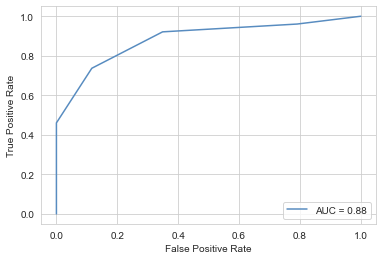

In [89]:
all_work(knn_model,X,y)

# Normal Model

In [90]:
error_rate=[]
for i in range(1,20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'error_rate')

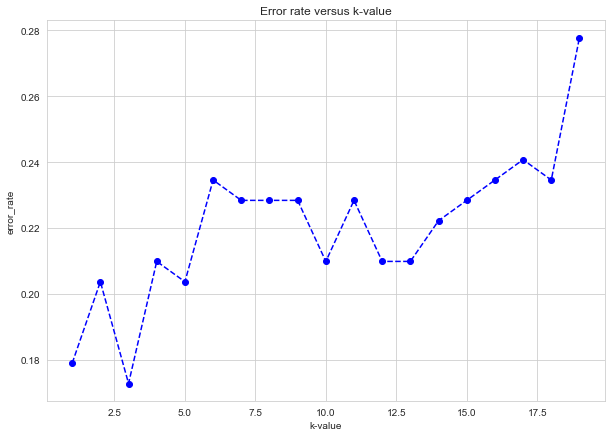

In [91]:
plt.figure(figsize=(10,7))
plt.plot(range(1,20),error_rate,color='blue',linestyle='--',marker='o',markersize=6)
plt.title("Error rate versus k-value")
plt.xlabel('k-value')
plt.ylabel('error_rate')

In [92]:
knn_model1=KNeighborsClassifier(n_neighbors=5)
knn_model1.fit(X_train,y_train)

KNeighborsClassifier()

In [93]:
knn_pred1=knn_model1.predict(X_test)

In [94]:


#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,knn_pred1))
print("classification report: \n", classification_report(y_test,knn_pred1))


metrics on test data 

confusion matrix: 
 [[75 11]
 [22 54]]
classification report: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        86
           1       0.83      0.71      0.77        76

    accuracy                           0.80       162
   macro avg       0.80      0.79      0.79       162
weighted avg       0.80      0.80      0.79       162



# SVM Classifier

In [95]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)

the accuracies of kfold are :
 [0.71052632 0.71681416 0.71681416 0.71681416 0.7079646 ]
None


stratified mean accuracy are :
 [0.7105263157894737, 0.7168141592920354, 0.7168141592920354, 0.7168141592920354, 0.7079646017699115]
None
Best Threshold=0.727087, G-Mean=0.637
enter the best thrshold value: 0.727087
metrics on test data 

confusion matrix: 
 [[59 27]
 [31 45]]
classification report: 
               precision    recall  f1-score   support

           0       0.66      0.69      0.67        86
           1       0.62      0.59      0.61        76

    accuracy                           0.64       162
   macro avg       0.64      0.64      0.64       162
weighted avg       0.64      0.64      0.64       162



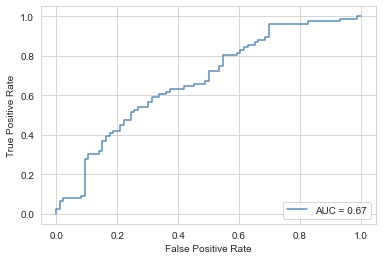

In [96]:
#roc model
all_work(svc_model,X,y)

# Normal model

In [97]:
svc_model1=SVC()

In [98]:
svc_model1.fit(X_train,y_train)

SVC()

In [99]:
svc_pred1=svc_model1.predict(X_test)

In [100]:
print("metrics on test data \n")
print("confusion matrix: \n",confusion_matrix(y_test,svc_pred1))
print("classification report: \n", classification_report(y_test,svc_pred1))

metrics on test data 

confusion matrix: 
 [[51 35]
 [16 60]]
classification report: 
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        86
           1       0.63      0.79      0.70        76

    accuracy                           0.69       162
   macro avg       0.70      0.69      0.68       162
weighted avg       0.70      0.69      0.68       162



# Optimized model

In [101]:
#params=[{'C':[1,10,100],
#        'kernel':['rbf','linear','poly'],
#        'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#      }]

In [102]:
#gcv=RandomizedSearchCV(svc_model,param_distributions=params,scoring='accuracy',cv=5,n_jobs=-1)

In [103]:
#gcv.fit(X_train,y_train)

In [104]:
#gcv.best_estimator_

In [105]:
sv_model2=SVC(C=100,gamma=0.6)
sv_model2.fit(X_train,y_train)
sv_pred2=sv_model2.predict(X_test)

In [106]:

#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,sv_pred2))
print("classification report: \n", classification_report(y_test,sv_pred2))

metrics on test data 

confusion matrix: 
 [[73 13]
 [11 65]]
classification report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        86
           1       0.83      0.86      0.84        76

    accuracy                           0.85       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.85      0.85      0.85       162



# Decission Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt_model=DecisionTreeClassifier()

the accuracies of kfold are :
 [0.68421053 0.67256637 0.54867257 0.57522124 0.72566372]
None


stratified mean accuracy are :
 [0.6842105263157895, 0.6548672566371682, 0.5929203539823009, 0.584070796460177, 0.7079646017699115]
None
Best Threshold=1.000000, G-Mean=0.796
enter the best thrshold value: 1.000000
metrics on test data 

confusion matrix: 
 [[86  0]
 [76  0]]
classification report: 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69        86
           1       0.00      0.00      0.00        76

    accuracy                           0.53       162
   macro avg       0.27      0.50      0.35       162
weighted avg       0.28      0.53      0.37       162



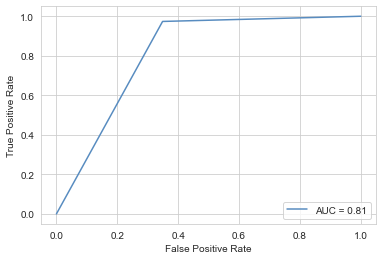

In [109]:
#roc model
all_work(dt_model,X,y)

# Normal Model

In [110]:
dt_model1=DecisionTreeClassifier()

In [111]:
dt_model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
dt_pred1=dt_model1.predict(X_test)

In [113]:
print("metrics on test data \n")
print("confusion matrix:\n",confusion_matrix(y_test,dt_pred1))
print("classification report:\n",classification_report(y_test,dt_pred1))


metrics on test data 

confusion matrix:
 [[51 35]
 [24 52]]
classification report:
               precision    recall  f1-score   support

           0       0.68      0.59      0.63        86
           1       0.60      0.68      0.64        76

    accuracy                           0.64       162
   macro avg       0.64      0.64      0.64       162
weighted avg       0.64      0.64      0.64       162



# Optimized model

In [114]:
#parameters={'criterion':['gini','entropy','log_loss'],
#         "splitter":["best","random"]
#            "max_depth":[1,3,5,7,9,11,12],
#              "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#               "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#               "max_features":['auto','log2','sqrt',None],
#                   "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [115]:
##gcv=GridSearchCV(dt_model,
#               param_grid=parameters,
#                cv=5,
#              n_jobs=-1,
#                scoring='accuracy')

In [116]:
#gcv.fit(X_train,y_train)

In [117]:
#gcv.best_estimator_

In [118]:
dt_model2=DecisionTreeClassifier(max_depth=12,max_features='sqrt',max_leaf_nodes=50,
                                 min_weight_fraction_leaf=0.1)

In [119]:
dt_model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, max_features='sqrt', max_leaf_nodes=50,
                       min_weight_fraction_leaf=0.1)

In [120]:
dt_pred2=dt_model2.predict(X_test)

In [121]:

#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,dt_pred2))
print("classification report: \n", classification_report(y_test,dt_pred2))

metrics on test data 

confusion matrix: 
 [[60 26]
 [28 48]]
classification report: 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        86
           1       0.65      0.63      0.64        76

    accuracy                           0.67       162
   macro avg       0.67      0.66      0.66       162
weighted avg       0.67      0.67      0.67       162



# Random forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf_model=RandomForestClassifier()

the accuracies of kfold are :
 [0.69298246 0.71681416 0.67256637 0.6460177  0.75221239]
None


stratified mean accuracy are :
 [0.7017543859649122, 0.7079646017699115, 0.7168141592920354, 0.6460176991150443, 0.7610619469026548]
None
Best Threshold=0.730000, G-Mean=0.976
enter the best thrshold value: 0.730000
metrics on test data 

confusion matrix: 
 [[82  4]
 [ 2 74]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.95      0.97      0.96        76

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



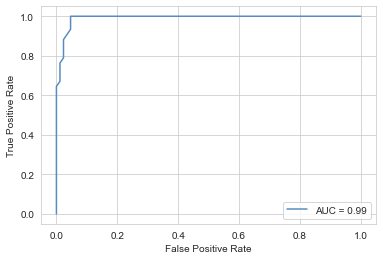

In [124]:
all_work(rf_model,X,y)

# Normal model

In [125]:
rf_model1=RandomForestClassifier()

In [126]:
rf_model1.fit(X_train,y_train)

RandomForestClassifier()

In [127]:
rf_pred1=rf_model1.predict(X_test)

In [128]:

#metrics on test data
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,rf_pred1))
print("classification report: \n", classification_report(y_test,rf_pred1))


metrics on test data 

confusion matrix: 
 [[63 23]
 [17 59]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        86
           1       0.72      0.78      0.75        76

    accuracy                           0.75       162
   macro avg       0.75      0.75      0.75       162
weighted avg       0.76      0.75      0.75       162



In [129]:
# params_1={'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [130]:
# gcv=RandomizedSearchCV(RandomForestClassifier(),
#                          param_distributions=params_1,
#                          #cv=5,
#                          n_jobs=-1,
#                        verbose=2
#                          )
# gcv.fit(X_train,y_train)

In [131]:
# gcv.best_estimator_

In [132]:
rf_model2=RandomForestClassifier(bootstrap=False,max_depth=80,min_samples_split=5,
                                 n_estimators=2000)
rf_model2.fit(X_train,y_train)
rf_pred2=rf_model2.predict(X_test)
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,rf_pred2))
print("classification report: \n", classification_report(y_test,rf_pred2))


metrics on test data 

confusion matrix: 
 [[61 25]
 [15 61]]
classification report: 
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        86
           1       0.71      0.80      0.75        76

    accuracy                           0.75       162
   macro avg       0.76      0.76      0.75       162
weighted avg       0.76      0.75      0.75       162



# Gradient boosting

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
gb_model=GradientBoostingClassifier()

the accuracies of kfold are :
 [0.66666667 0.73451327 0.62831858 0.62831858 0.71681416]
None


stratified mean accuracy are :
 [0.6666666666666666, 0.7256637168141593, 0.6371681415929203, 0.6283185840707964, 0.7168141592920354]
None
Best Threshold=0.715768, G-Mean=0.853
enter the best thrshold value: 0.715768
metrics on test data 

confusion matrix: 
 [[68 18]
 [ 6 70]]
classification report: 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        86
           1       0.80      0.92      0.85        76

    accuracy                           0.85       162
   macro avg       0.86      0.86      0.85       162
weighted avg       0.86      0.85      0.85       162



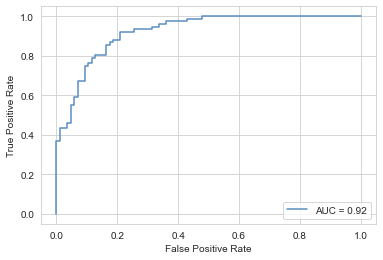

In [135]:
all_work(gb_model,X,y)

# Normal model

In [136]:
gb_model1=GradientBoostingClassifier()

In [137]:
gb_model1.fit(X_train,y_train)

GradientBoostingClassifier()

In [138]:
gb_pred1=gb_model1.predict(X_test)

In [139]:
print("metrics on test data \n")
print("confusion matrix: \n",confusion_matrix(y_test,gb_pred1))
print("classification report:\n",classification_report(y_test,gb_pred1))

metrics on test data 

confusion matrix: 
 [[59 27]
 [15 61]]
classification report:
               precision    recall  f1-score   support

           0       0.80      0.69      0.74        86
           1       0.69      0.80      0.74        76

    accuracy                           0.74       162
   macro avg       0.75      0.74      0.74       162
weighted avg       0.75      0.74      0.74       162



# XGB Classifier

In [140]:
from xgboost import XGBClassifier

In [141]:
xgb_model=XGBClassifier()

the accuracies of kfold are :
 [0.6754386  0.69026549 0.65486726 0.61946903 0.77876106]
None


stratified mean accuracy are :
 [0.6754385964912281, 0.6902654867256637, 0.6548672566371682, 0.6194690265486725, 0.7787610619469026]
None
Best Threshold=0.932911, G-Mean=0.964
enter the best thrshold value: 0.932911
metrics on test data 

confusion matrix: 
 [[81  5]
 [ 2 74]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        86
           1       0.94      0.97      0.95        76

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



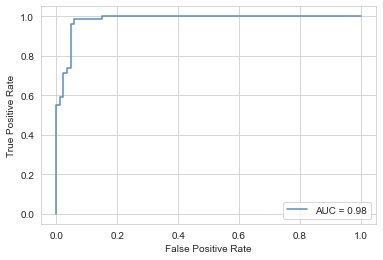

In [142]:
all_work(xgb_model,X,y)

# Normal model

In [143]:
xgb_model1=XGBClassifier()

In [144]:
xgb_model1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
xgb_pred1=xgb_model1.predict(X_test)

In [146]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,xgb_pred1))
print("classification report: \n", classification_report(y_test,xgb_pred1))


metrics on test data 

confusion matrix: 
 [[61 25]
 [12 64]]
classification report: 
               precision    recall  f1-score   support

           0       0.84      0.71      0.77        86
           1       0.72      0.84      0.78        76

    accuracy                           0.77       162
   macro avg       0.78      0.78      0.77       162
weighted avg       0.78      0.77      0.77       162



# Bagging classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

rf_model = RandomForestClassifier()  # Create an instance of the RandomForestClassifier
bag_model = BaggingClassifier(base_estimator=rf_model)  # Pass it to BaggingClassifier


the accuracies of kfold are :
 [0.70175439 0.71681416 0.71681416 0.61946903 0.74336283]
None


stratified mean accuracy are :
 [0.6666666666666666, 0.7168141592920354, 0.6991150442477876, 0.6106194690265486, 0.7610619469026548]
None
Best Threshold=0.716000, G-Mean=0.924
enter the best thrshold value: 0.716000
metrics on test data 

confusion matrix: 
 [[82  4]
 [ 9 67]]
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        86
           1       0.94      0.88      0.91        76

    accuracy                           0.92       162
   macro avg       0.92      0.92      0.92       162
weighted avg       0.92      0.92      0.92       162



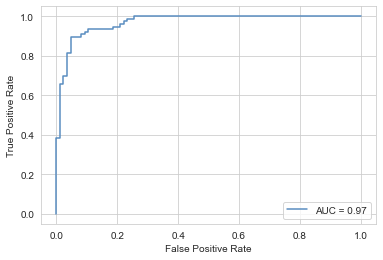

In [152]:
all_work(bag_model,X,y)

# Normal model

In [155]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Create an instance of SVC (Support Vector Classifier)
sv_model1 = SVC()

# Now you can use sv_model1 in BaggingClassifier
bag_model1 = BaggingClassifier(base_estimator=sv_model1)


In [156]:
bag_model1.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC())

In [157]:
bag_pred1=bag_model1.predict(X_test)

In [158]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,bag_pred1))
print("classification report: \n", classification_report(y_test,bag_pred1))


metrics on test data 

confusion matrix: 
 [[45 41]
 [13 63]]
classification report: 
               precision    recall  f1-score   support

           0       0.78      0.52      0.62        86
           1       0.61      0.83      0.70        76

    accuracy                           0.67       162
   macro avg       0.69      0.68      0.66       162
weighted avg       0.70      0.67      0.66       162



In [166]:

models=[log_model,knn_model,svc_model,dt_model,rf_model,gb_model,xgb_model,bag_model]

<Figure size 576x432 with 0 Axes>

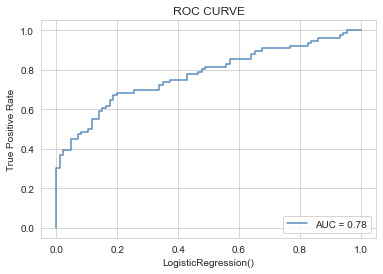

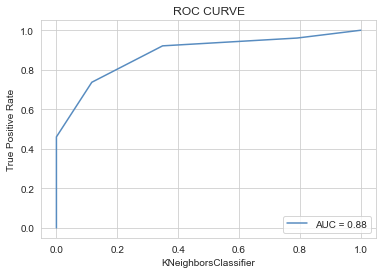

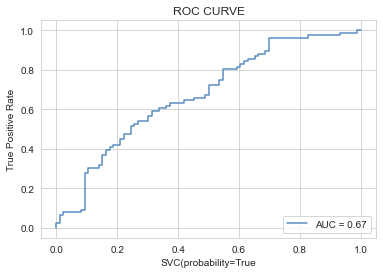

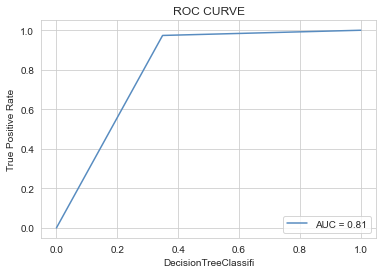

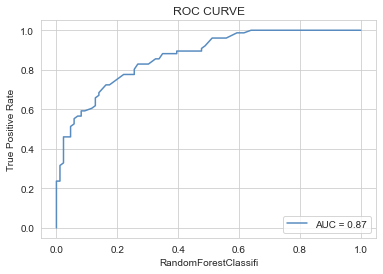

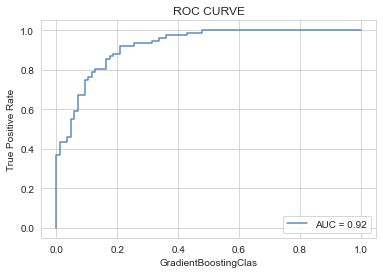

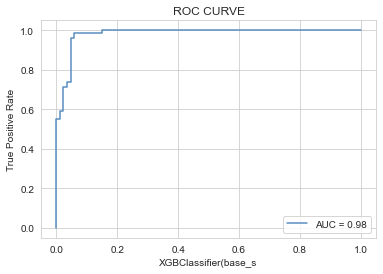

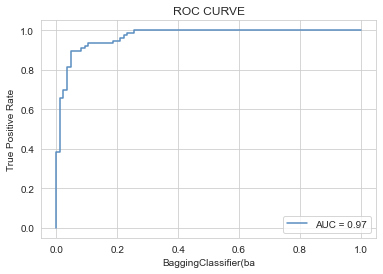

In [167]:
plt.figure(figsize=(8,6))

for i in models:

    log=i.predict_proba(X_test)
    fpr,tpr,threshold=roc_curve(y_test,log[:,-1])
    auc_score=auc(fpr,tpr)
    RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc_score).plot()
    plt.xlabel(str(i)[:20])
    plt.title('ROC CURVE')